### Here is the link to my git with my project: https://github.com/VladlenaSamusev/HW_PythonWorkshop_MiniProject1

# Part A
# Covariance measures the linear relationship between two variables, expressed in their original units and defined by the formula
$$\text{Cov}(X, Y) = \frac{\sum_{i=1}^N (x_i - \bar{x})(y_i - \bar{y})}{N}$$
# Correlation, standardized from covariance, quantifies both the strength and direction of the linear relationship on a scale from -1 to 1, with its formula
$$r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2 \sum (y_i - \bar{y})^2}}$$
# While covariance indicates the tendency of variables to vary together, correlation standardizes this measurement to make it independent of the units.


# Part B

In [1]:
!pip3 install seaborn
!pip3 install matplotlib
!pip3 install pandas
!pip3 install numpy
!pip3 install scikit-learn
!pip3 install plotly-express
!pip3 install nbformat
!pip3 install --upgrade nbformat


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import plotly.express as px

In [3]:
# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names) # Add the 'species' column with One-Hot Encoding

In [4]:
iris_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## For this data set we have 4 features:Sepal Length, Sepal Width, Petal Length and Petal Width , all units in cm for 3 Species: Iris-setosa, Iris-versicolor and Iris-virginica

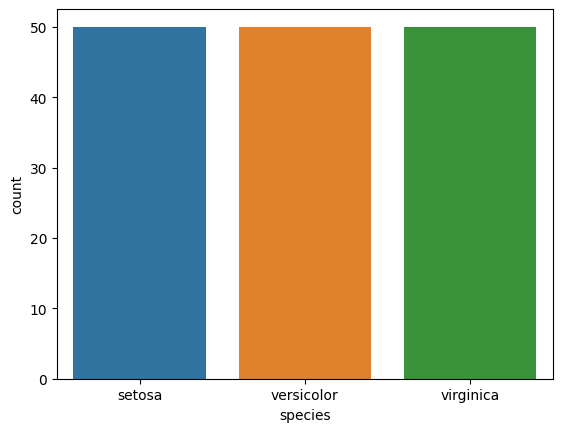

In [6]:
#Let's took how much of each species we have in data set.
sns.countplot(x='species', data=iris_df, hue='species')
plt.show()
# We see that we have an equal number of each one of species.

In [7]:
'''We can create a scatter plot. We can determine any characteristics of interest of the iris flower.
We can start by plotting the length and width of Sepal on a two-dimensional scatter plot,
where the x-axis represents the length of the characteristic, and the y-axis represents the width.
We can differentiate the species by using three different colors.'''

def scatter2d(feature_of_interest_1, feature_of_interest_2):
    sns.scatterplot(x=feature_of_interest_1, y=feature_of_interest_2, hue='species', data=iris_df)
    plt.xlabel(f"{feature_of_interest_1} (cm)") #as we know from looking on dataset all units are in cm, so i'm interested in plotting those units on a sctter plot
    plt.ylabel(f"{feature_of_interest_2} (cm)")
    plt.legend(title='Species')
    plt.show()

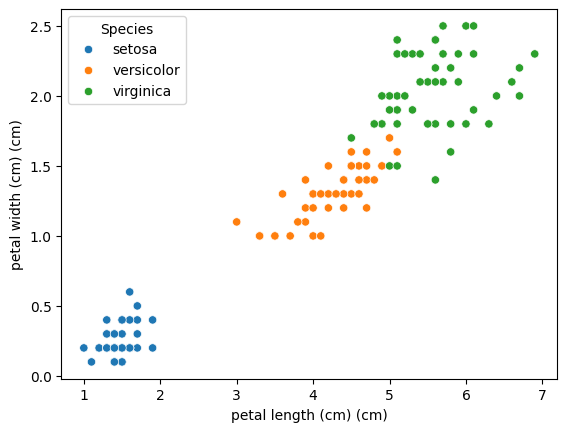

In [8]:
feature_of_interest_1 = 'petal length (cm)' #characteristics of interest 1
feature_of_interest_2 = 'petal width (cm)' #characteristics of interest 2
scatter2d(feature_of_interest_1,feature_of_interest_2)

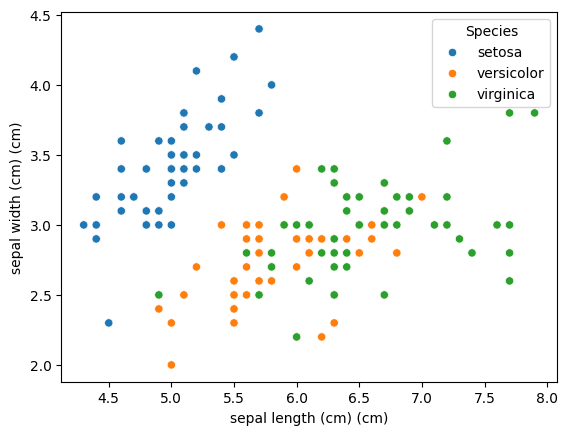

In [9]:
feature_of_interest_1 = 'sepal length (cm)'
feature_of_interest_2 = 'sepal width (cm)'
scatter2d(feature_of_interest_1,feature_of_interest_2)

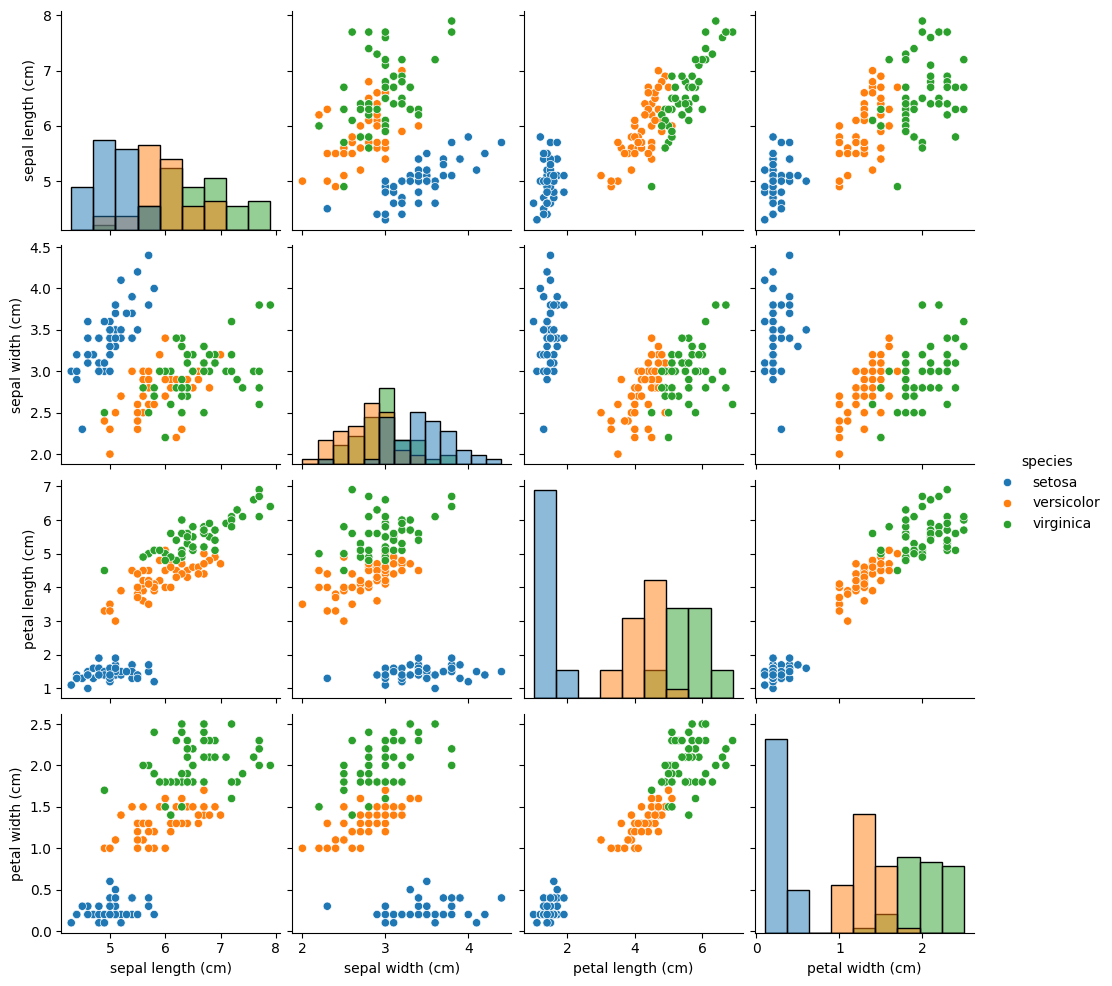

In [10]:
#instead of plotting each 2 characteristic separately we can plot them all toghether and their distribution (of charachteristics)
sns.pairplot(iris_df, hue="species",diag_kind = 'hist') #histogram when a feature will be paired by itself.
plt.show()

array([[<Axes: title={'center': 'petal length (cm)'}, xlabel='[species]'>,
        <Axes: title={'center': 'petal width (cm)'}, xlabel='[species]'>],
       [<Axes: title={'center': 'sepal length (cm)'}, xlabel='[species]'>,
        <Axes: title={'center': 'sepal width (cm)'}, xlabel='[species]'>]],
      dtype=object)

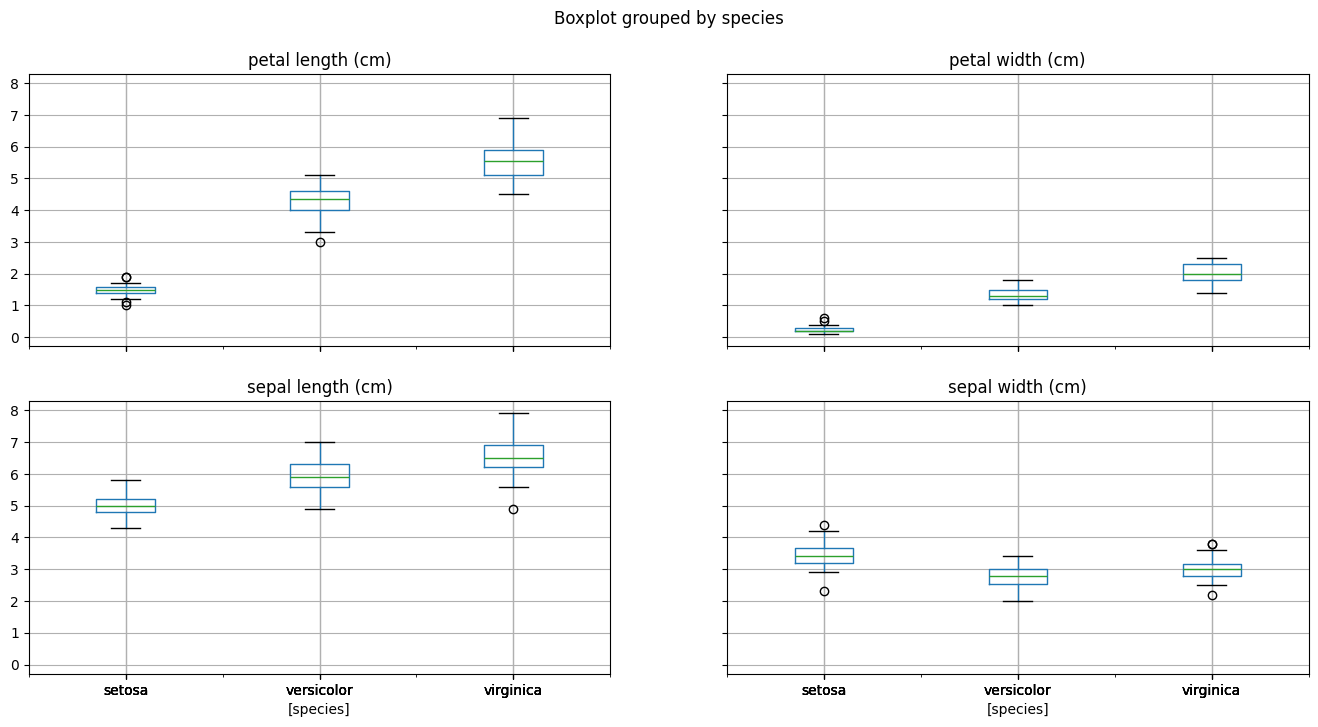

In [11]:
# Seaborn boxplot for on each features split out by specis.
iris_df.boxplot(by = 'species', figsize = (16,8))

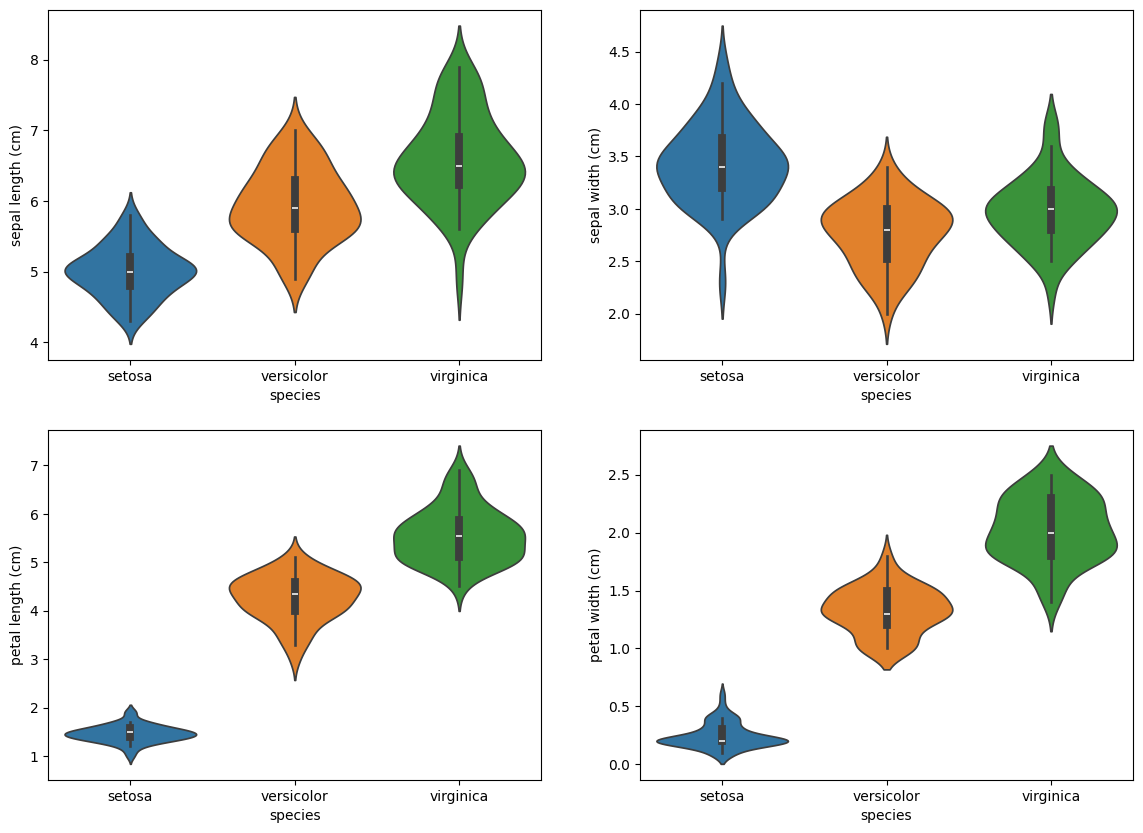

In [12]:
# The violin plot displays the density of the lengths and widths of the species.
# In the violin plot, denser regions are wider, and sparser regions are narrower.

plt.figure(figsize=(14, 10))
plt.subplot(2,2,1)
sns.violinplot(x='species', y='sepal length (cm)', data=iris_df, hue='species')
plt.subplot(2,2,2)
sns.violinplot(x='species', y='sepal width (cm)', data=iris_df, hue='species')
plt.subplot(2,2,3)
sns.violinplot(x='species', y='petal length (cm)', data=iris_df, hue='species')
plt.subplot(2,2,4)
sns.violinplot(x='species', y='petal width (cm)', data=iris_df, hue='species')

plt.show()


# Part C

## A function to calculate the covariance between two variables:

In [13]:
# formula of Cov is shown in Part A, using this formula for function creation
def calcCov(x, y):
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    #covarience
    products = [(xi - mean_x) * (yi - mean_y) for xi, yi in zip(x, y)]
    covariance = sum(products) / (len(x)-1) # n-1 as we calculating the sample covariance and not population covariance
    return covariance


In [14]:
#implementation of cov for petal lenght and width
x = iris_df['petal length (cm)']
y = iris_df['petal width (cm)']
covariance = calcCov(x, y)
print("Covariance:", covariance)

Covariance: 1.2956093959731545


In [15]:
#implementation of cov for sepal lenght and width
x = iris_df['sepal length (cm)']
y = iris_df['sepal width (cm)']
covariance = calcCov(x, y)
print("Covariance:", covariance)

Covariance: -0.04243400447427291


## A function to compute the Covariance matrix:

In [16]:
def covMat(data):
    # We need to exclude the 'species' column from the calculation as it's a str, we will exclude it if it's present (we assuming it's the last column or by name)
    data = data.drop(columns=['species'], axis=1) if 'species' in data.columns else data
    data = np.array(data)
    # We will subtract the mean of each feature from the data to center it
    mean_centered_data = data - np.mean(data, axis=0)
    # Compute the covariance matrix using the formula: (X^T * X) / (n-1)
    covariance_matrix = np.dot(mean_centered_data.T, mean_centered_data) / (data.shape[0] - 1)

    return covariance_matrix


In [17]:
#implementation of covMatrix
covariance_matrix = covMat(iris_df)
# Convert to a DataFrame for better readability
cov_df = pd.DataFrame(covariance_matrix,
                      columns=iris_df.columns[:-1],
                      index=iris_df.columns[:-1])

print("Covariance Matrix:")
print(cov_df)

Covariance Matrix:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           0.685694         -0.042434           1.274315   
sepal width (cm)           -0.042434          0.189979          -0.329656   
petal length (cm)           1.274315         -0.329656           3.116278   
petal width (cm)            0.516271         -0.121639           1.295609   

                   petal width (cm)  
sepal length (cm)          0.516271  
sepal width (cm)          -0.121639  
petal length (cm)          1.295609  
petal width (cm)           0.581006  


# Part D Test 1

In [18]:
my_cov_matrix = covMat(iris_df)
cov_matrix_numpy = np.cov(iris.data, rowvar=False)
print("Covariance Matrix (My Function):")
print(my_cov_matrix)
print("\nCovariance Matrix (NumPy np.cov):")
print(cov_matrix_numpy)

Covariance Matrix (My Function):
[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]

Covariance Matrix (NumPy np.cov):
[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]


## Part E

In [19]:
def corrMat(data):
  #Computation of the covariance matrix using the my function
  cov_matrix = covMat(data)
  #Calculate the standard deviations of each feature
  std_dev = np.sqrt(np.diag(cov_matrix))
  #Calculate the correlation matrix by normalizing the covariance matrix by dividing by std
  corr_matrix = cov_matrix / np.outer(std_dev, std_dev)
  return corr_matrix

In [20]:
#implementation
my_corr_matrix = corrMat(iris_df)
print("Correlation Matrix:")
print(my_corr_matrix)

Correlation Matrix:
[[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]]


# Part F Test 2

In [21]:
my_corr_matrix = corrMat(iris_df)
corr_matrix_numpy = np.corrcoef(iris.data, rowvar=False)
print("Correlation Matrix (My Function):")
print(my_corr_matrix)
print("\nCorrelation Matrix (NumPy np.cov):")
print(corr_matrix_numpy)



Correlation Matrix (My Function):
[[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]]

Correlation Matrix (NumPy np.cov):
[[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]]


# Part G Visualization of Results

## Test 1

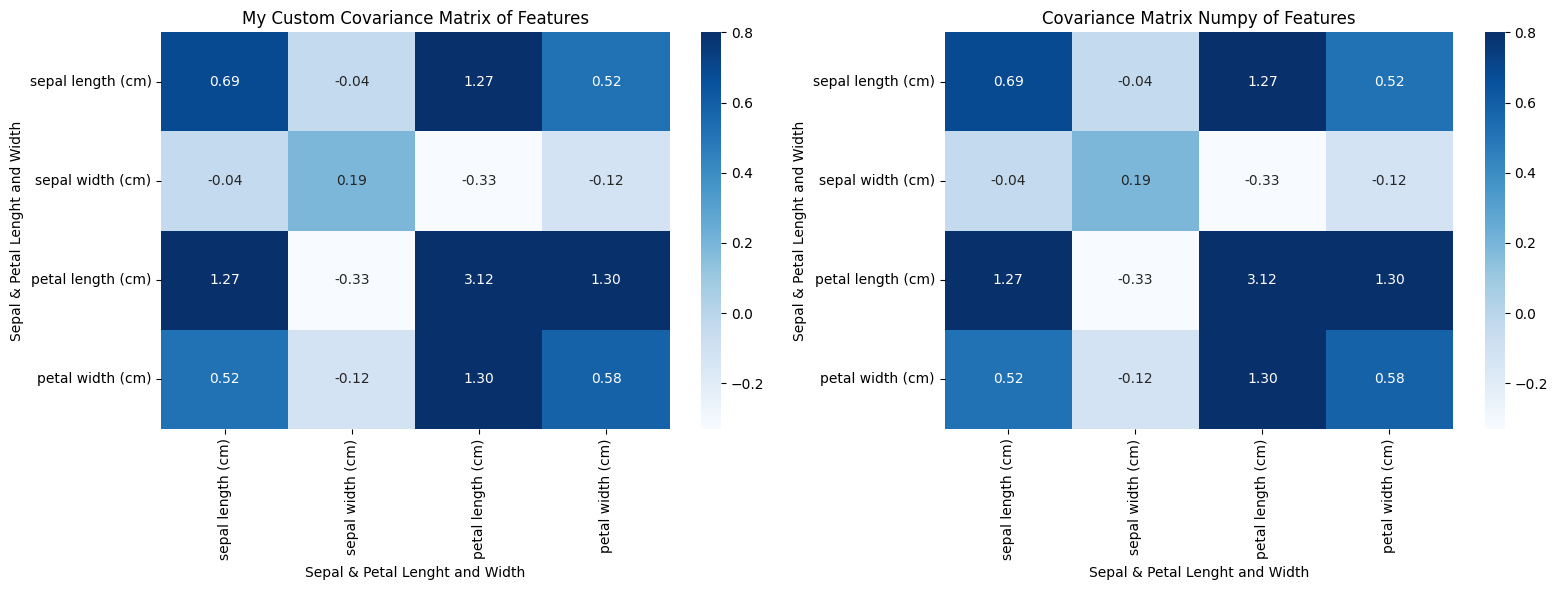

In [22]:
# We want to exclude the 'species' column but include feature (characteristics names)
feature_names = [col for col in iris_df.columns if col != 'species']
# We want to create a figure with two subplots
f, ax = plt.subplots(1, 2, figsize=(16, 6))
# Plot the heatmaps of covarience
sns.heatmap(my_cov_matrix, vmax=.8, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=feature_names, yticklabels=feature_names, ax=ax[0])
ax[0].set(title='My Custom Covariance Matrix of Features', xlabel='Sepal & Petal Lenght and Width', ylabel='Sepal & Petal Lenght and Width')

sns.heatmap(cov_matrix_numpy, vmax=.8, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=feature_names, yticklabels=feature_names, ax=ax[1])
ax[1].set(title='Covariance Matrix Numpy of Features', xlabel='Sepal & Petal Lenght and Width', ylabel='Sepal & Petal Lenght and Width')

plt.tight_layout()
plt.show()

## Test 2


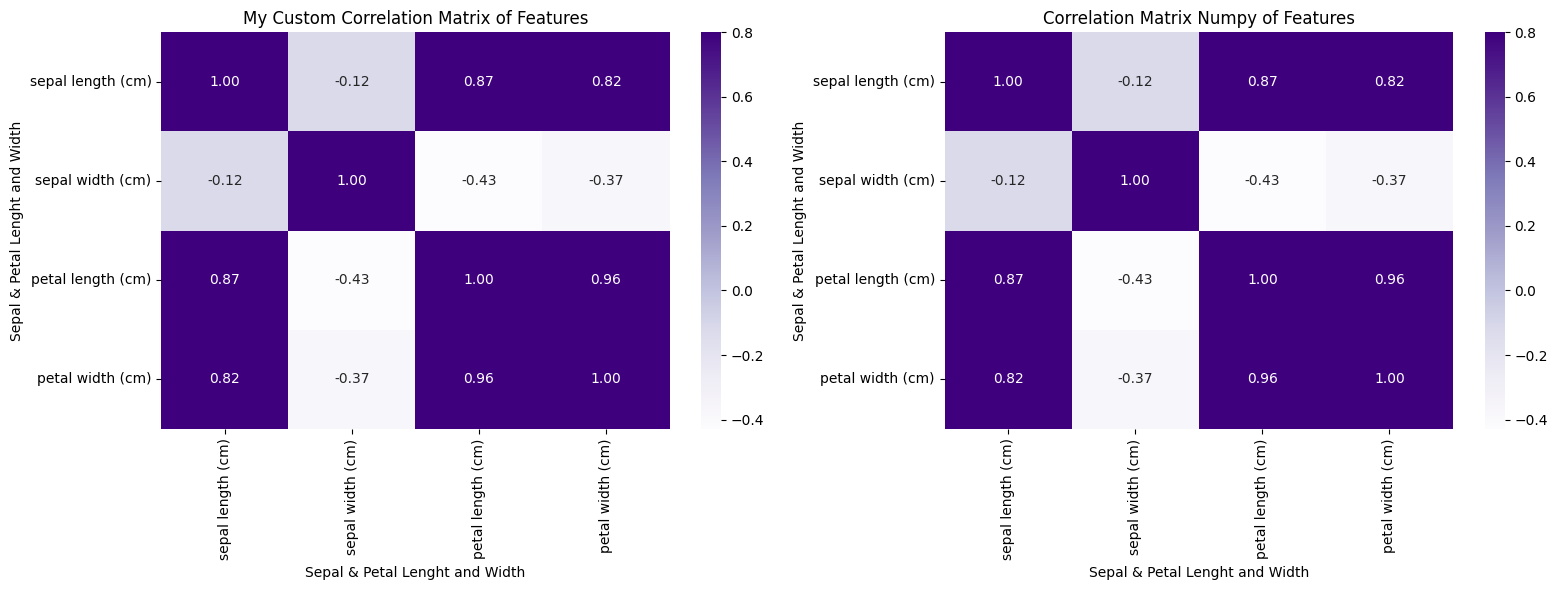

In [23]:
# We want to exclude the 'species' column but include feature (characteristics names)
feature_names = [col for col in iris_df.columns if col != 'species']
# We want to create a figure with two subplots
f, ax = plt.subplots(1, 2, figsize=(16, 6))
# Plot the heatmaps of correlation
sns.heatmap(my_corr_matrix, vmax=.8, annot=True, fmt='.2f', cmap='Purples',
            xticklabels=feature_names, yticklabels=feature_names, ax=ax[0])
ax[0].set(title='My Custom Correlation Matrix of Features', xlabel='Sepal & Petal Lenght and Width', ylabel='Sepal & Petal Lenght and Width')

sns.heatmap(corr_matrix_numpy, vmax=.8, annot=True, fmt='.2f', cmap='Purples',
            xticklabels=feature_names, yticklabels=feature_names, ax=ax[1])
ax[1].set(title='Correlation Matrix Numpy of Features', xlabel='Sepal & Petal Lenght and Width', ylabel='Sepal & Petal Lenght and Width')

plt.tight_layout()
plt.show()


# Question 2

In [24]:
laptop_data = pd.read_csv('laptop_price - dataset.csv', encoding='latin1')

In [25]:
laptop_data.head(5)

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


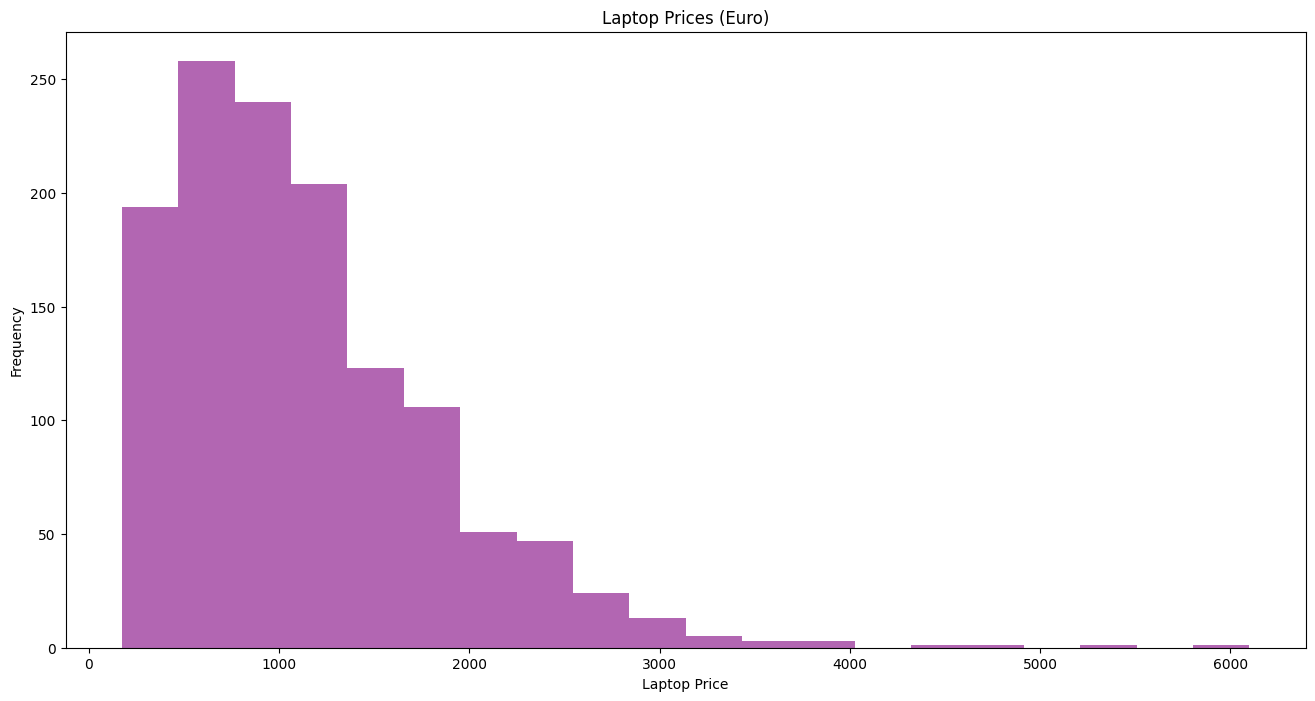

In [26]:
plt.figure(figsize=(16, 8))
plt.hist(laptop_data['Price (Euro)'], color='purple', alpha=0.6, bins=20)
plt.title('Laptop Prices (Euro)')
plt.xlabel('Laptop Price')
plt.ylabel('Frequency')
plt.show()

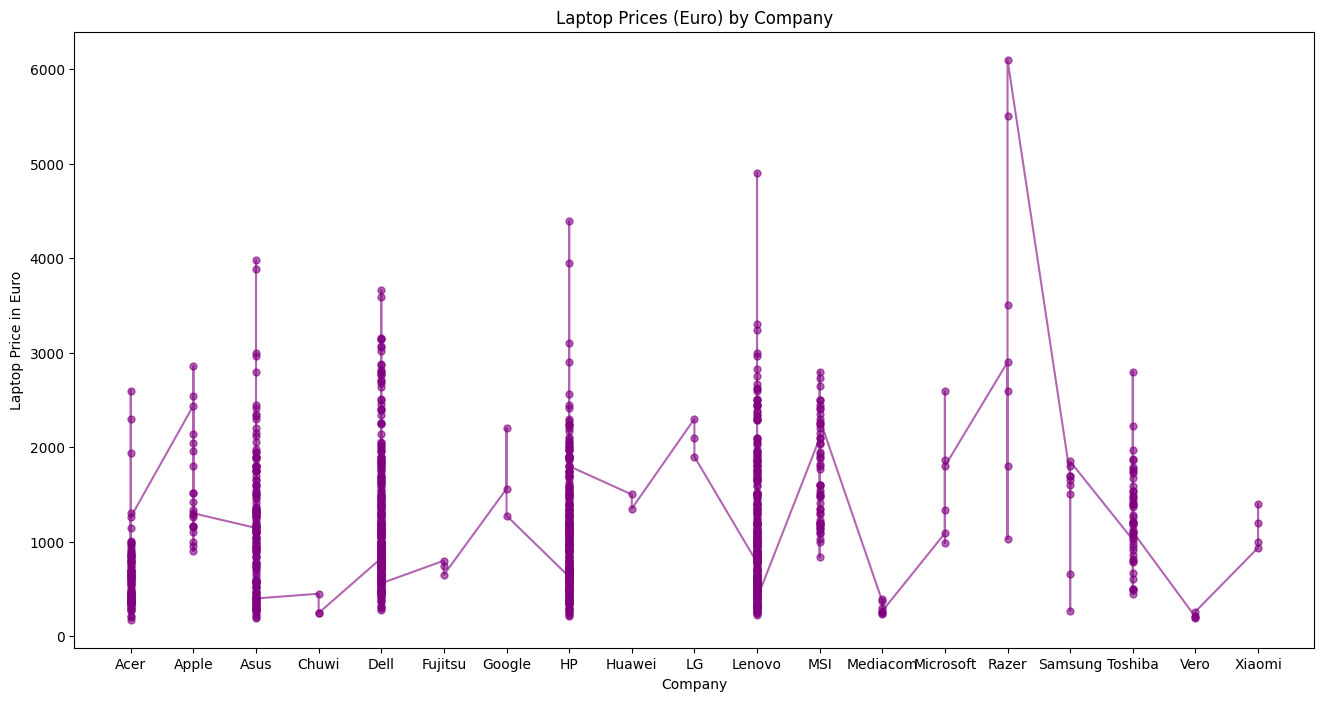

In [27]:
laptop_data.sort_values(by='Company', inplace=True) #Sort the data by 'Company'
plt.figure(figsize=(16, 8))
plt.plot(laptop_data['Company'], laptop_data['Price (Euro)'], 'o-', color='purple', alpha=0.6, markersize=5)
plt.title('Laptop Prices (Euro) by Company')
plt.xlabel('Company')
plt.ylabel('Laptop Price in Euro')
plt.show()

In [28]:
company_avg_price = laptop_data.groupby('Company')['Price (Euro)'].mean()
company_avg_price.sort_values(ascending=False, inplace=True)

most_expensive_company = company_avg_price.idxmax()
highest_avg_price = company_avg_price.max()

print(f"The company with the highest average laptop price is {most_expensive_company} with an average price of {highest_avg_price:.2f} euros.")
print(f'Average prices of each company sorted from highest to lowest: {company_avg_price}')


The company with the highest average laptop price is Razer with an average price of 3346.14 euros.
Average prices of each company sorted from highest to lowest: Company
Razer        3346.142857
LG           2099.000000
MSI          1728.908148
Google       1677.666667
Microsoft    1612.308333
Apple        1564.198571
Huawei       1424.000000
Samsung      1413.444444
Toshiba      1267.812500
Dell         1199.225120
Xiaomi       1133.462500
Asus         1123.829737
Lenovo       1093.862215
HP           1080.314664
Fujitsu       729.000000
Acer          633.464455
Chuwi         314.296667
Mediacom      295.000000
Vero          217.425000
Name: Price (Euro), dtype: float64


In [29]:
laptop_data['OpSys'].unique() #unique OpSys before uniformity

array(['Windows 10', 'Chrome OS', 'Linux', 'macOS', 'Mac OS X', 'No OS',
       'Windows 10 S', 'Windows 7', 'Android'], dtype=object)

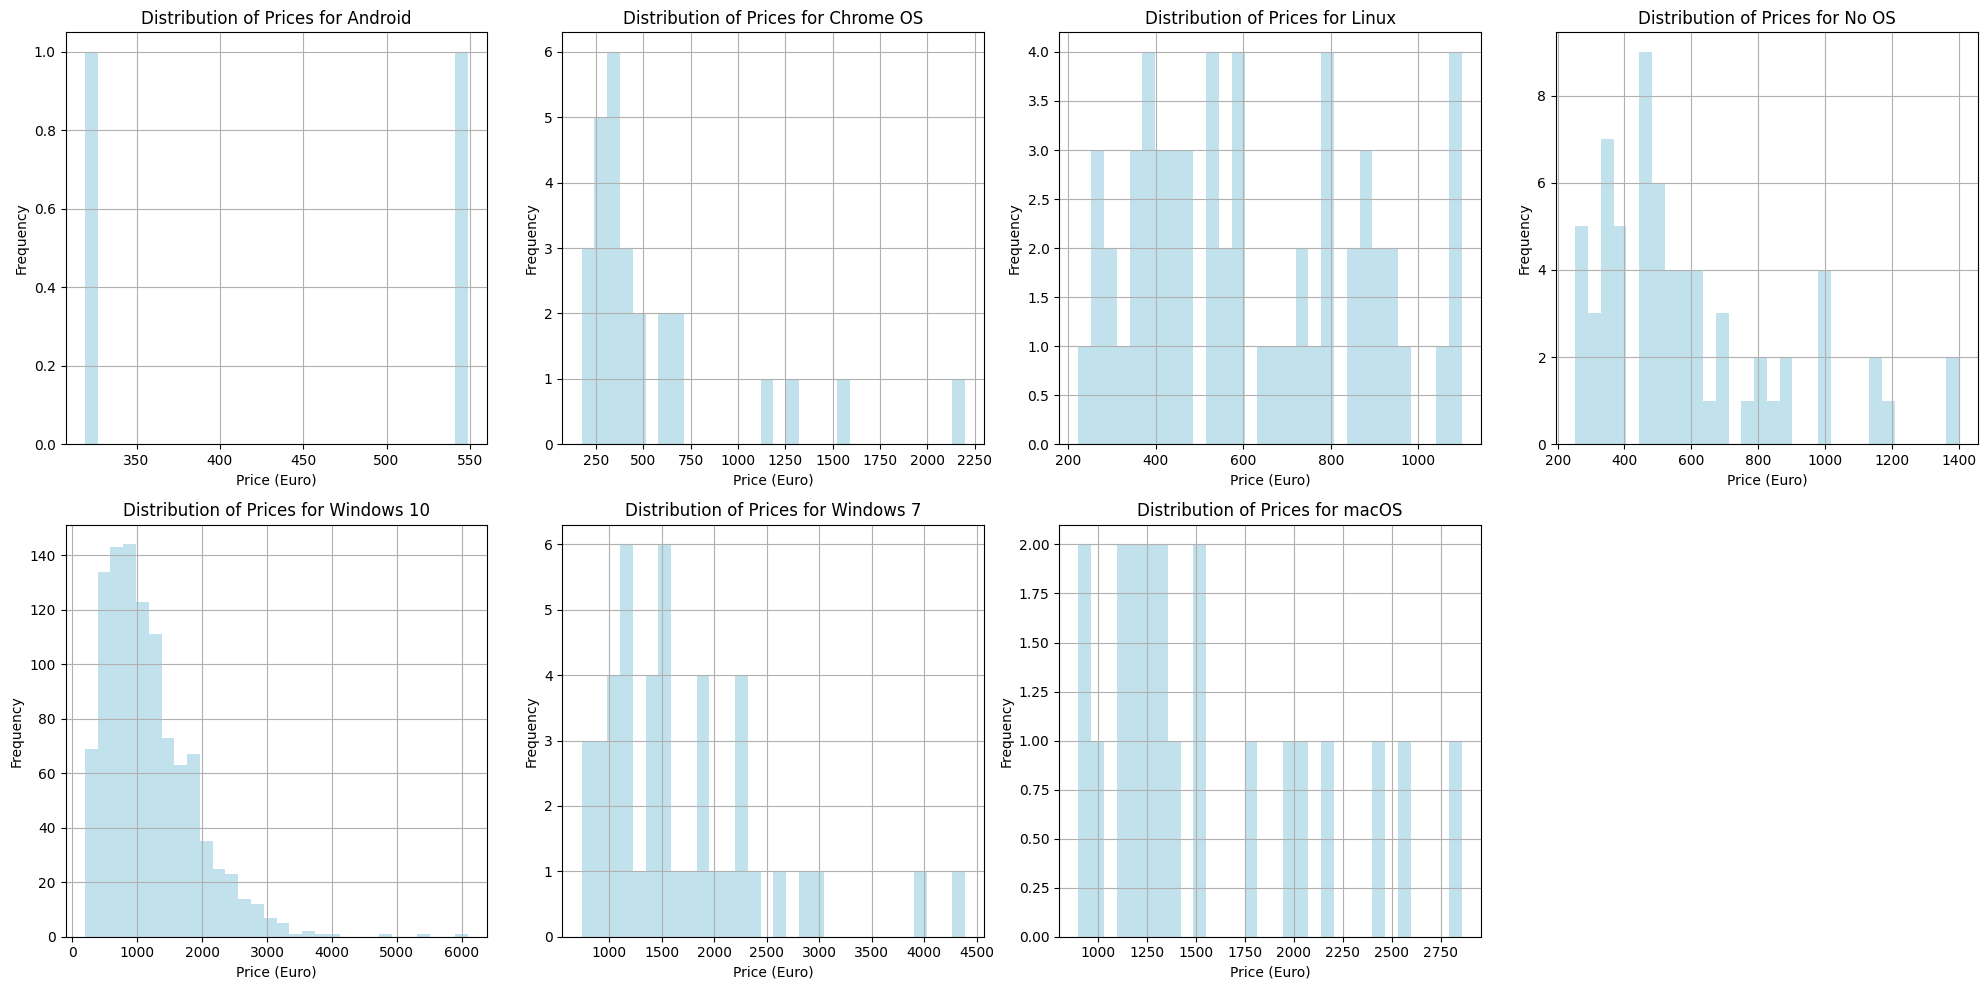

In [30]:
# Assuming 'laptop_data' DataFrame is already defined and loaded

# Normalize the 'OpSys' column for consistency
laptop_data['OpSys'] = laptop_data['OpSys'].replace(['Mac OS X'], 'macOS')
laptop_data['OpSys'] = laptop_data['OpSys'].replace(['Windows 10 S'], 'Windows 10')

# Determine number of unique operating systems
unique_os = laptop_data['OpSys'].unique()
n_os = len(unique_os)

# Calculate the number of rows needed for 4 columns
nrows = (n_os + 3) // 4  # Ensures that any remainder is handled by adding an extra row

# Create a figure with subplots
fig, axes = plt.subplots(nrows=nrows, ncols=4, figsize=(20, 5 * nrows))  # Adjust figsize as necessary

# Flatten axes array for easier indexing
axes = axes.flatten()

# Loop through each unique operating system and create a plot
for index, (os_name, subset) in enumerate(laptop_data.groupby('OpSys')):
    ax = axes[index]  # Get the corresponding axes object
    ax.hist(subset['Price (Euro)'], bins=30, alpha=0.75, color='lightblue')  # Ensure the column name is correct
    ax.set_title(f'Distribution of Prices for {os_name}')
    ax.set_xlabel('Price (Euro)')
    ax.set_ylabel('Frequency')
    ax.grid(True)

# Turn off unused subplots if the number of OSes isn't a multiple of 4
for i in range(index + 1, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [31]:
laptop_data['OpSys'].unique() #unique OpSys after uniformity

array(['Windows 10', 'Chrome OS', 'Linux', 'macOS', 'No OS', 'Windows 7',
       'Android'], dtype=object)

# The relationship between RAM and computer price shows a clear positive trend: as the amount of RAM in laptops increases, the median price generally rises. This correlation suggests that higher RAM is typically associated with more expensive laptops, likely reflecting higher performance and more advanced specifications suitable for demanding applications.

In [32]:
fig = px.box(laptop_data, x="RAM (GB)", y="Price (Euro)", points="all",
             labels={"Ram": "RAM (GB)", "Price_euros": "Price (Euros)"},
             title="Distribution of Laptop Prices by RAM Size")


fig.show()

Text(0.5, 1.0, 'Relationship Between RAM and Computer Price')

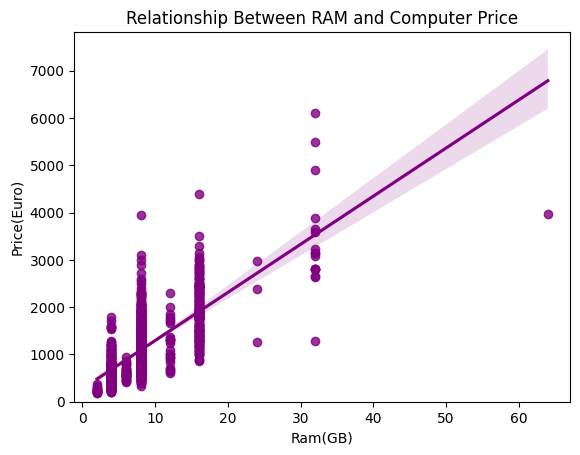

In [33]:
sns.regplot(x="RAM (GB)", y="Price (Euro)", data=laptop_data, color='purple')
plt.ylim(0,)
plt.xlabel("Ram(GB)")
plt.ylabel('Price(Euro)')
plt.title('Relationship Between RAM and Computer Price')

In [34]:
laptop_data['Memory'].unique()

array(['500GB HDD', '128GB SSD +  1TB HDD', '256GB SSD',
       '32GB Flash Storage', '128GB SSD', '1TB HDD', '16GB Flash Storage',
       '256GB SSD +  1TB HDD', '128GB Flash Storage', '16GB SSD',
       '32GB SSD', '512GB SSD', '256GB Flash Storage',
       '512GB Flash Storage', '512GB SSD +  2TB HDD',
       '512GB SSD +  1TB HDD', '512GB SSD +  512GB SSD',
       '256GB SSD +  256GB SSD', '128GB HDD', '1TB SSD', '2TB HDD',
       '64GB Flash Storage', '256GB SSD +  500GB HDD', '64GB SSD',
       '256GB SSD +  2TB HDD', '64GB Flash Storage +  1TB HDD',
       '1.0TB Hybrid', '1TB SSD +  1TB HDD', '512GB SSD +  256GB SSD',
       '128GB SSD +  2TB HDD', '240GB SSD', '8GB SSD', '180GB SSD',
       '512GB SSD +  1.0TB Hybrid', '1.0TB HDD',
       '256GB SSD +  1.0TB Hybrid', '1TB HDD +  1TB HDD', '508GB Hybrid',
       '32GB HDD'], dtype=object)

In [35]:
def extract_storage_type(memory_column):
    # Storage types we will look for
    storage_types = ['SSD', 'HDD', 'Flash Storage', 'Hybrid']
    found_types = []

    # Loop to go through each type and add to the list if found
    for storage_type in storage_types:
        if storage_type in memory_column:
            found_types.append(storage_type)

    # Join found storage types with '+'
    return ' + '.join(found_types)

laptop_data['Storage Type'] = laptop_data['Memory'].apply(extract_storage_type)
laptop_data['Storage Type'].head(10)

739              HDD
730        SSD + HDD
124              SSD
706              SSD
695    Flash Storage
690    Flash Storage
679              SSD
733              HDD
132              SSD
669              SSD
Name: Storage Type, dtype: object

In [36]:
laptop_data['Storage Type'].unique()

array(['HDD', 'SSD + HDD', 'SSD', 'Flash Storage', 'HDD + Flash Storage',
       'Hybrid', 'SSD + Hybrid'], dtype=object)

# List of additonal questions:


1.   Which company is more gaming-oriented?
- **Analysis**: Count the number of laptops labeled as "Gaming" by each company.
- **Visualization**: Bar chart showing the count of gaming laptops by company.
2.   What is the relationship between CPU and price?
- **Analysis**: Group by CPU type and calculate the average price for each type.
- **Visualization**: Bar plot or scatter plot showing CPU types versus average prices.
3.   What is the relationship between screen size and weight?
- **Analysis**: Calculate the correlation coefficient between screen size and weight.
- **Visualization**: Scatter plot with screen size on the x-axis (Independent Variable) and weight on the y-axis(Dependent Variable).
4.   What is the relationship between screen size and price?
- **Analysis**: Calculate the correlation coefficient between screen size and price.
- **Visualization**: Scatter plot with screen size on the x-axis (Independent Variable) and price on the y-axis(Dependent Variable).
5.   What is the relationship between Storage type and price?
- **Analysis**: Group by storage type and calculate the average price for each type.
- **Visualization**: Bar chart showing different storage types vs average prices.
6.   How do the specifications of gaming laptops compare to general use laptops within the same price range?
- **Analysis**: Compare average GPU and CPU specifications for gaming and non-gaming laptops within similar price brackets.
- **Visualization**: Box plots for GPU and CPU performance by laptop type within price brackets.
7.   Is there a notable compromise between portability (weight and size) and performance across different brands and price ranges?
- **Analysis**: Analyze trends and correlations between performance metrics (e.g.CPU, GPU) and portability (e.g. weight, size) within different price ranges.
- **Visualization**: Scatter plots or bubble charts showing performance metrics versus portability features, categorized by price range.
8.   What is Relationship between CPU core and laptop prices?
- **Analysis**:Extract or parse the core count from CPU specifications, group laptops by core count, and analyze price metrics like the average and median for each group.
- **Visualization**: Box plots for CPU core and Prices









In [37]:
# laptop_data.loc[laptop_data['TypeName']=="Gaming"]
laptop_data.loc[laptop_data['Company']=="Razer"]['TypeName'].unique()

array(['Gaming', 'Ultrabook'], dtype=object)

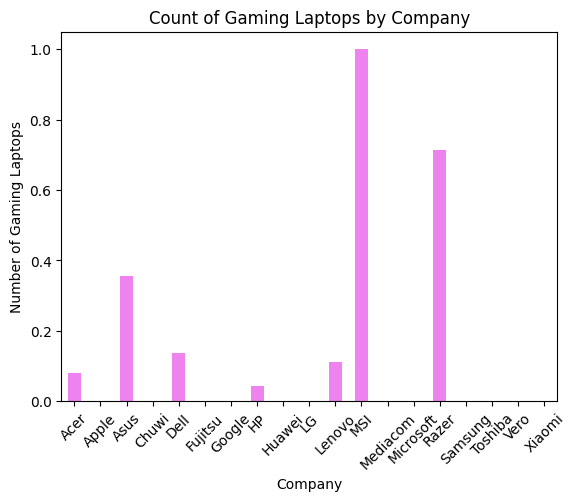

The company with the most gaming-oriented focus is MSI, because 100.0 % of their laptops are made for gaming.


In [38]:
#Which company is more gaming-oriented?
total_laptops_per_company = laptop_data.groupby('Company').size()
gaming_laptops = laptop_data[laptop_data['TypeName'] == 'Gaming'].groupby('Company').size() / total_laptops_per_company

gaming_laptops.plot(kind='bar', color='violet')
plt.title('Count of Gaming Laptops by Company')
plt.xlabel('Company')
plt.ylabel('Number of Gaming Laptops')
plt.xticks(rotation=45)
plt.show()

sorted_gaming_laptops = gaming_laptops.sort_values()
# Find the maximum number of gaming laptops and the company with the highest count
max_gaming_laptops = sorted_gaming_laptops.max()
company_with_most_gaming_laptops = sorted_gaming_laptops.idxmax()

# Print out the company with the most gaming laptops
print(f"The company with the most gaming-oriented focus is {company_with_most_gaming_laptops}, because {max_gaming_laptops * 100} % of their laptops are made for gaming.")

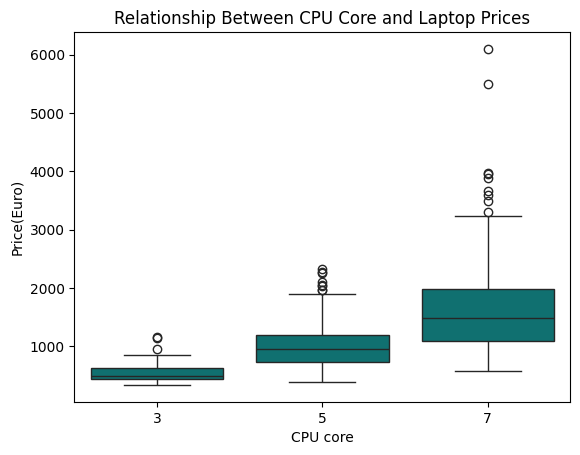

In [39]:
#What is Relationship between CPU core and laptop prices?
#function to extract_CPU_core
def extract_CPU_core(cpu_column):
    cpu_core = ['i3', 'i5', 'i7']
    for cpu_type in cpu_core:
        if cpu_type in cpu_column:
            return cpu_type[-1]  # Return the first match
    return None  # Return None if no match is found

laptop_data['CPU core'] = laptop_data['CPU_Type'].apply(extract_CPU_core)

cpu_core_order = ['3', '5', '7']
sns.boxplot(x="CPU core", y="Price (Euro)", data=laptop_data, color='teal', order=cpu_core_order)
plt.title('Relationship Between CPU Core and Laptop Prices')
plt.xlabel('CPU core')
plt.ylabel('Price(Euro)')
plt.show()
